In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import re
from nltk.corpus import stopwords
import string

In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [4]:
data = pd.read_csv("C:/Users/IYANU Egbuwalo/Downloads/archive/filename.csv")

In [5]:
print(data.head())

             id  conversation_id               created_at        date  \
0  1.600000e+18     1.600000e+18  2022-11-29 00:47:13 UTC  29/11/2022   
1  1.600000e+18     1.600000e+18  2022-11-29 00:47:10 UTC  29/11/2022   
2  1.600000e+18     1.600000e+18  2022-11-29 00:47:08 UTC  29/11/2022   
3  1.600000e+18     1.600000e+18  2022-11-29 00:47:07 UTC  29/11/2022   
4  1.600000e+18     1.600000e+18  2022-11-29 00:47:07 UTC  29/11/2022   

       time  timezone       user_id    username               name place  ...  \
0  00:47:13         0  1.470000e+18  shawneng10     ~natfes-todnes   NaN  ...   
1  00:47:10         0  8.628942e+06     marcjef            marcjef   NaN  ...   
2  00:47:08         0  1.500000e+18  tballs4375            T Balls   NaN  ...   
3  00:47:07         0  1.270000e+18      amtrpa  Transhumanist Ben   NaN  ...   
4  00:47:07         0  1.520000e+18    nwrewind            Phil d.   NaN  ...   

  geo source user_rt_id user_rt retweet_id  \
0 NaN    NaN        NaN     

checking out the columns

In [6]:
print(data.columns)

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')


In [7]:
data = data[["username", "tweet", "language"]]

In [8]:
## checking if there are nulls in the column

data.isnull().sum()

username    0
tweet       0
language    0
dtype: int64

In [9]:
data["language"].value_counts()

en     8628
pt      403
it      191
qme     176
ru      117
und      79
ja       71
in       55
es       53
ca       21
ar       20
de       20
fr       20
th       17
fi       14
sr       14
nl       12
qht      12
vi       10
pl        6
et        6
tr        5
zxx       5
el        4
qam       4
bn        4
uk        4
zh        4
ro        4
tl        3
cs        3
fa        3
da        3
ko        2
art       1
hi        1
sv        1
bg        1
ht        1
qst       1
ur        1
cy        1
lv        1
Name: language, dtype: int64

In [10]:
## most of the tweets are in English which is a good thing for us.
## now we can prepare the task for sentiment analysis
## links, punctuations, symbols and other language errors are removed from the tweet


In [11]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword = set(stopwords.words("english"))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://S+|www.\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text = " ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text
data["tweet"] = data["tweet"].apply(clean)

[nltk_data] Downloading package stopwords to C:\Users\IYANU
[nltk_data]     Egbuwalo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


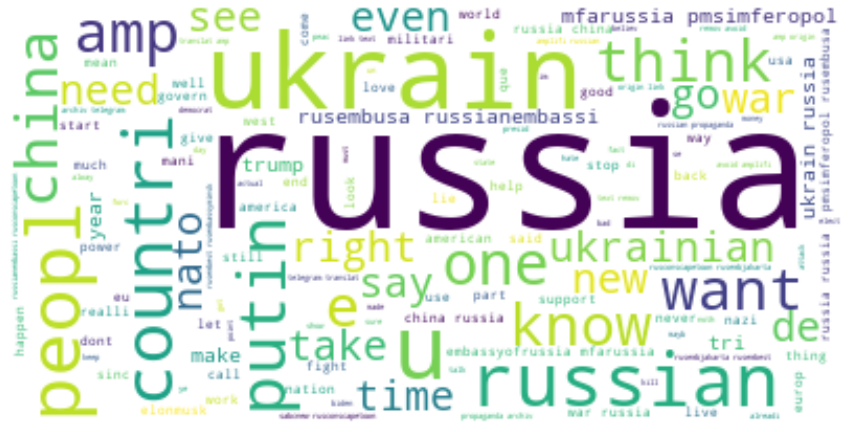

In [12]:
## now we check out the most used words

text = " ".join(i for i in data.tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords = stopwords, background_color = "white").generate(text)
##wordcloud = WordCloud().generate(text)

plt.figure(figsize = (15,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [13]:
## adding 3 columns as positive, negative and neutral by calculating the
## sentiment scores of the tweets

In [26]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["tweet"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["tweet"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["tweet"]]
data = data[["tweet", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to C:\Users\IYANU
[nltk_data]     Egbuwalo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
C:\Users\IYANU Egbuwalo\AppData\Local\Temp\ipykernel_12668\701608040.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["tweet"]]


                                               tweet  Positive  Negative  \
0  palmerreport use ukrain fight russia us provok...     0.000     0.412   
1              alishbabaigpti cnn open critic russia     0.000     0.344   
2  rjmacnaughton aaronjm cours local element invo...     0.132     0.357   
3  anderssandberg much like iran even russia regi...     0.217     0.000   
4  lockwoodw readi mask russia attack wonder what...     0.000     0.279   

   Neutral  
0    0.588  
1    0.656  
2    0.511  
3    0.783  
4    0.721  


In [ ]:
## looking back at the most frequent words used by  people with positive sentiments

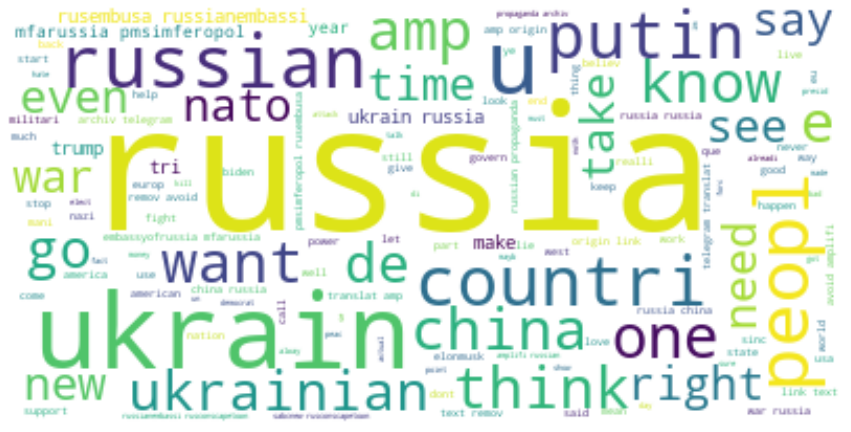

In [29]:
positive = ' '.join([i for i in data['tweet'][data['Positive'] > data["Negative"]]])

stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords = stopwords, background_color = "white").generate(text)
plt.figure(figsize = (15,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [ ]:
## looking at the most used words by people with negative sentiments

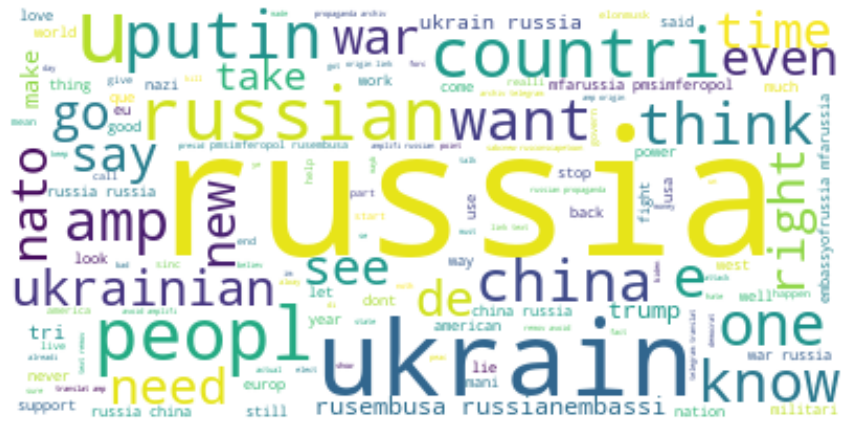

In [32]:
negative = ' '.join([i for i in data['tweet'][data['Negative'] > data['Positive']]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords = stopwords, background_color = 'white').generate(text)
plt.figure(figsize = (15,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()